In [103]:
import numpy
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn import datasets
import pandas as pd
loan = pd.read_csv('F:\\loan\\loan.csv')


print(loan.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [17]:
n_sample,n_features=loan.shape
print(loan.shape)

(614, 13)


In [18]:
list(loan.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [20]:
for _ in loan.columns:
    print("The number of null values in:{} == {}".format(_, data[_].isnull().sum()))

The number of null values in:Loan_ID == 0
The number of null values in:Gender == 13
The number of null values in:Married == 3
The number of null values in:Dependents == 15
The number of null values in:Education == 0
The number of null values in:Self_Employed == 32
The number of null values in:ApplicantIncome == 0
The number of null values in:CoapplicantIncome == 0
The number of null values in:LoanAmount == 22
The number of null values in:Loan_Amount_Term == 14
The number of null values in:Credit_History == 50
The number of null values in:Property_Area == 0
The number of null values in:Loan_Status == 0


In [21]:
pred_var = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']


In [25]:
missing_pred = ['Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Gender', 'Married','Credit_History']

for _ in missing_pred:
    print("List of unique labels for {}:::{}".format(_, set(data[_])))

List of unique labels for Dependents:::{nan, '0', '2', '1', '3+'}
List of unique labels for Self_Employed:::{nan, 'Yes', 'No'}
List of unique labels for Loan_Amount_Term:::{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 12.0, 36.0, 300.0, 180.0, 60.0, 84.0, 480.0, 360.0, 240.0, 120.0}
List of unique labels for Gender:::{nan, 'Female', 'Male'}
List of unique labels for Married:::{nan, 'Yes', 'No'}
List of unique labels for Credit_History:::{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}


In [47]:
from sklearn.model_selection import train_test_split


In [48]:
y_train = y_train.replace({'Y':1, 'N':0}).as_matrix()
y_test = y_test.replace({'Y':1, 'N':0}).as_matrix()

c:\users\shailendra porwal\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
c:\users\shailendra porwal\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [49]:
X_train['Dependents'] = X_train['Dependents'].fillna('0')
X_train['Self_Employed'] = X_train['Self_Employed'].fillna('No')
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean())

In [50]:
X_train['Credit_History'] = X_train['Credit_History'].fillna(1)
X_train['Married'] = X_train['Married'].fillna('No')
X_train['Gender'] = X_train['Gender'].fillna('Female')
X_train['LoanAmount'] = X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean())

In [51]:
l= ['Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Gender', 'Married','Credit_History']

for _ in l:
    print("List of unique labels for {}:{}".format(_, set(X_train[_])))
    


List of unique labels for Dependents:{'1', '0', '2', '3+'}
List of unique labels for Self_Employed:{'Yes', 'No'}
List of unique labels for Loan_Amount_Term:{480.0, 36.0, 360.0, 339.1002227171492, 300.0, 12.0, 240.0, 180.0, 84.0, 120.0, 60.0}
List of unique labels for Gender:{'Female', 'Male'}
List of unique labels for Married:{'No', 'Yes'}
List of unique labels for Credit_History:{0.0, 1.0}


In [52]:
for _ in X_train.columns:
    print("The number of null values in:{} == {}".format(_, X_train[_].isnull().sum()))

The number of null values in:Gender == 0
The number of null values in:Married == 0
The number of null values in:Dependents == 0
The number of null values in:Education == 0
The number of null values in:Self_Employed == 0
The number of null values in:ApplicantIncome == 0
The number of null values in:CoapplicantIncome == 0
The number of null values in:LoanAmount == 0
The number of null values in:Loan_Amount_Term == 0
The number of null values in:Credit_History == 0
The number of null values in:Property_Area == 0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data[pred_var], data['Loan_Status'],test_size=0.25, random_state=42)

In [55]:
param_grid = {"randomforestclassifier__n_estimators" : [10, 20, 30],
             "randomforestclassifier__max_depth" : [None, 6, 8, 10],
             "randomforestclassifier__max_leaf_nodes": [None, 5, 10, 20], 
             "randomforestclassifier__min_impurity_split": [0.1, 0.2, 0.3]}

In [57]:
import pandas

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

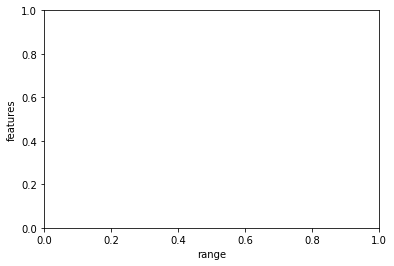

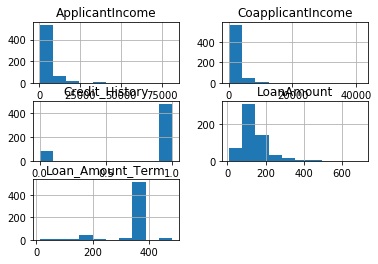

In [58]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.xlabel('range')
plt.ylabel('features')
data.hist()
plt.show()

In [59]:
col = loan.columns       # .columns gives columns names in data 
print(col)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [64]:
loan[loan.LoanAmount>10000].grade.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'grade'

In [61]:
import seaborn as sns 
y = loan.target
ax = sns.countplot(y,label="Count")       
A,B,C = y.value_counts()

AttributeError: 'DataFrame' object has no attribute 'target'

In [66]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


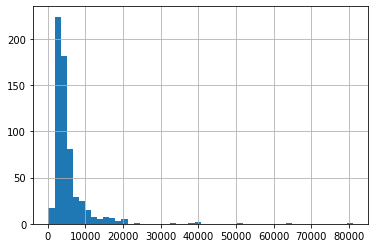

In [67]:
loan['ApplicantIncome'].hist(bins=50)

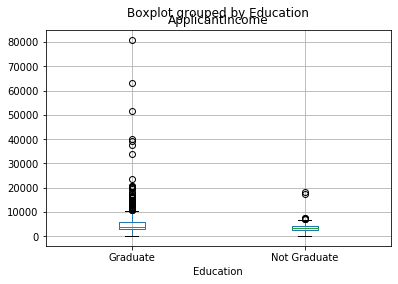

In [69]:
loan.boxplot(column='ApplicantIncome', by = 'Education')

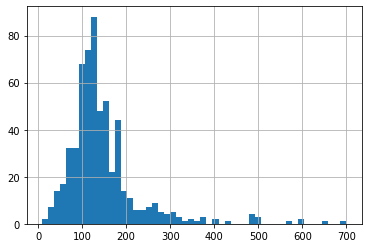

In [70]:
loan['LoanAmount'].hist(bins=50)

In [72]:
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print (impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556


In [75]:
pd.crosstab(loan["Credit_History"],loan["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [76]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [77]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


In [79]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print (pd.value_counts(data["LoanAmount_Bin"], sort=False))

low          104
medium       265
high         132
very high     91
Name: LoanAmount_Bin, dtype: int64


In [82]:
temp1 = loan['Credit_History'].value_counts(ascending=True)
temp2 = loan.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [85]:
temp1 = loan['Gender'].value_counts(ascending=True)
temp2 = loan.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Gender:') 
print (temp1)

print ('\nProbility of getting loan for each Gender class:')
print (temp2)

Frequency Table for Gender:
Female    112
Male      489
Name: Gender, dtype: int64

Probility of getting loan for each Gender class:
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


ValueError: num must be 1 <= num <= 2, not 3

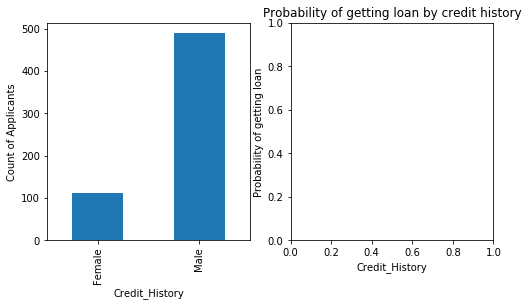

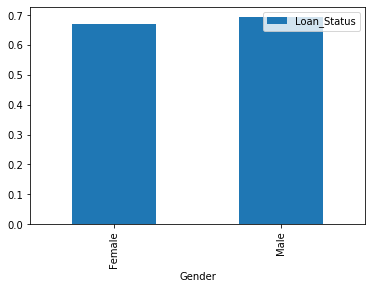

In [86]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
ax1 = fig.add_subplot(123)
ax1.set_xlabel('gender')
ax1.set_ylabel('Count of each gender')


ax2 = fig.add_subplot(124)
temp2.plot(kind = 'bar')
ax2.set_xlabel('gender')
ax2.set_ylabel('Probability of getting loan')


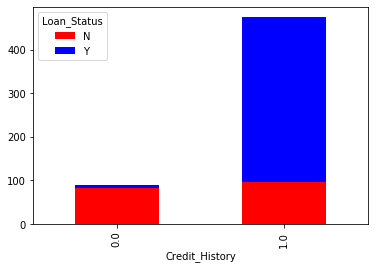

In [88]:
temp3 = pd.crosstab(loan['Credit_History'], loan['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [109]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# prepare dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = svm.SVC(kernel='rbf', gamma=0.5, C = 2.0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

print (metrics.classification_report(y_test, y_predicted))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.70      0.88      0.78         8
           2       0.86      0.67      0.75         9

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.84        30
weighted avg       0.88      0.87      0.87        30

Confusion matrix
[[13  0  0]
 [ 0  7  1]
 [ 0  3  6]]


In [110]:
sorted(loan)

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

In [116]:
import copy

In [117]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 45.6+ KB


In [183]:
loan.drop(['female'],axis=1,inplace=True)

In [176]:
loan['male']=0
loan['female']=0
loan['married']=0
loan['not_married']=0
loan['graduate']=0
loan['not_graduate']=0
loan['self_employed']=0
loan['not_self_employed']=0
loan['urban']=0
loan['semi_urban']=0
loan['rural']=0


itta=len(loan)

loan.loc[loan['Gender'] == "Male", 'male'] = 1
loan.loc[loan['Gender']=='Female','female']=1
loan.loc[loan['Married']=='Yes','married']=1
loan.loc[loan['Married']=='No','not_married']=1
loan.loc[loan['Education']=='Graduate','graduate']=1
loan.loc[loan['Education']=='Not Graduate','not_graduate']=1
loan.loc[loan['Self_Employed']=='Yes','self_employed']=1
loan.loc[loan['Self_Employed']=='No','not_self_employed']=1
loan.loc[loan['Property_Area']=='Urban','urban']=1
loan.loc[loan['Property_Area']=='Semiurban','semi_urban']=1
loan.loc[loan['Property_Area']=='Rural','rural']=1



In [187]:
loan.drop(['Married'],axis=1,inplace=True)


In [163]:
loan.drop(['Self_Employed'],axis=1,inplace=True)
loan.drop(['Education'],axis=1,inplace=True)
loan.drop(['Property_Area'],axis=1,inplace=True)

In [190]:
loan.head(2)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,married,not_married,graduate,not_graduate,self_employed,not_self_employed,urban,semi_urban,rural,male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,1,0,0,1,1,0,0,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,1,0,0,1,0,0,1,0


In [191]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# prepare dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = svm.SVC(kernel='rbf', gamma=0.5, C = 2.0).fit(X_train, y_train)
y_predicted = clf.predict(X_test)

print (metrics.classification_report(y_test, y_predicted))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.55      0.71        11
           2       0.67      1.00      0.80        10

    accuracy                           0.83        30
   macro avg       0.89      0.85      0.84        30
weighted avg       0.89      0.83      0.83        30

Confusion matrix
[[ 9  0  0]
 [ 0  6  5]
 [ 0  0 10]]


In [193]:
loan.head(2)

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,married,not_married,graduate,not_graduate,self_employed,not_self_employed,urban,semi_urban,rural,male
0,LP001002,0,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,1,0,0,1,1,0,0,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,1,0,0,1,0,0,1,0
